<a href="https://colab.research.google.com/github/prajnaraipn7/EIP/blob/master/Assignment1_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install -q keras
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print (X_train.shape)

(60000, 28, 28)


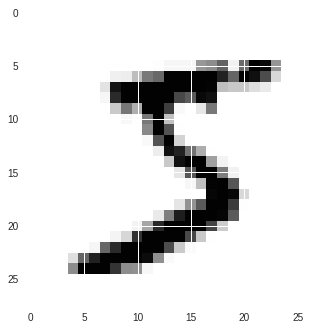

In [5]:
from matplotlib import pyplot as plt
# %matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()


In [12]:
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Convolution2D(128, 3, 3, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 11))
model.add(Flatten())
model.add(Activation('softmax'))


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        1290      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 10)          12110     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [15]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 435s 7ms/step - loss: 0.1558 - acc: 0.9527
Epoch 2/20
60000/60000 [==============================] - 431s 7ms/step - loss: 0.0572 - acc: 0.9826
Epoch 3/20
60000/60000 [==============================] - 433s 7ms/step - loss: 0.0431 - acc: 0.9866
Epoch 4/20
60000/60000 [==============================] - 433s 7ms/step - loss: 0.0345 - acc: 0.9890
Epoch 5/20
60000/60000 [==============================] - 435s 7ms/step - loss: 0.0277 - acc: 0.9912
Epoch 6/20
60000/60000 [==============================] - 436s 7ms/step - loss: 0.0247 - acc: 0.9921
Epoch 7/20
60000/60000 [==============================] - 434s 7ms/step - loss: 0.0204 - acc: 0.9934
Epoch 8/20
60000/60000 [==============================] - 431s 7ms/step - loss: 0.0173 - acc: 0.9943
Epoch 9/20
60000/60000 [==============================] - 432s 7ms/step - loss: 0.0156 - acc: 0.9946
Epoch 10/20
60000/60000 [==============================] - 432s 7ms/step - loss: 0.0140 - a

In [16]:


score = model.evaluate(X_test, Y_test, verbose=0)

print(score)

[0.06217061070430861, 0.9904]
